# Lab 5 - Data Visualization

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [233]:
df = pd.read_csv("nfloffenseweek3.csv")
df.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 32 artists>

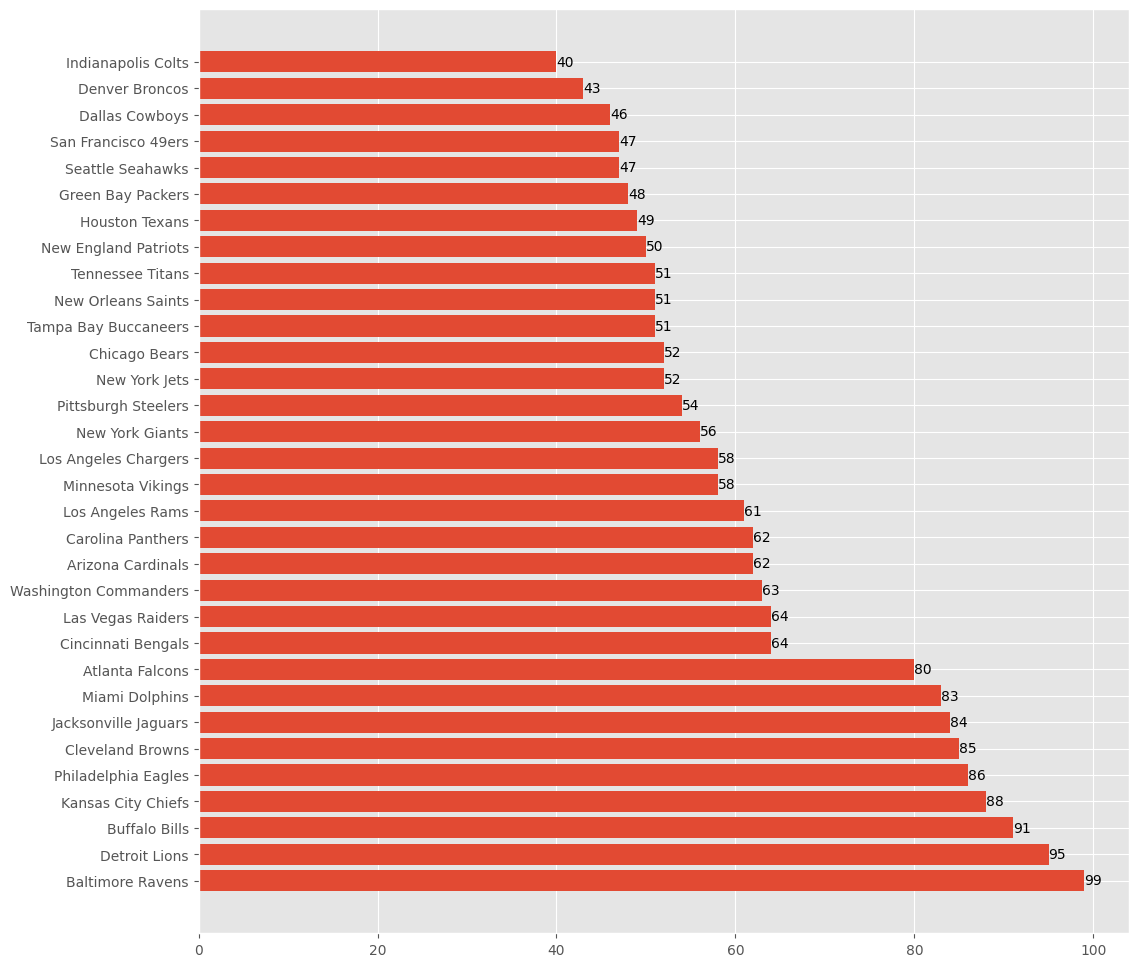

In [234]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored )
plt.bar_label(barhplot, labels = df.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

In [384]:
df1 = pd.read_csv("nfloffenseweek3.csv")
df2 = pd.read_csv("nfloffenseweek4.csv")
df3 = pd.read_csv("nfloffenseweek5.csv")

df1['week'] = 3
df2['week'] = 4
df3['week'] = 5

df = pd.concat([df1, df2, df3], axis=0)
df.head(5)

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,2,5.6,18,8,44,5,42.9,8.6,35.63,3
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,5,5.9,20,15,129,5,40.5,5.4,31.05,3
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,1,4.7,22,20,136,6,46.7,16.7,47.46,3
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,2,4.1,15,15,124,8,45.2,6.5,40.73,3
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,6,4.4,26,23,173,6,39.4,3.0,45.06,3


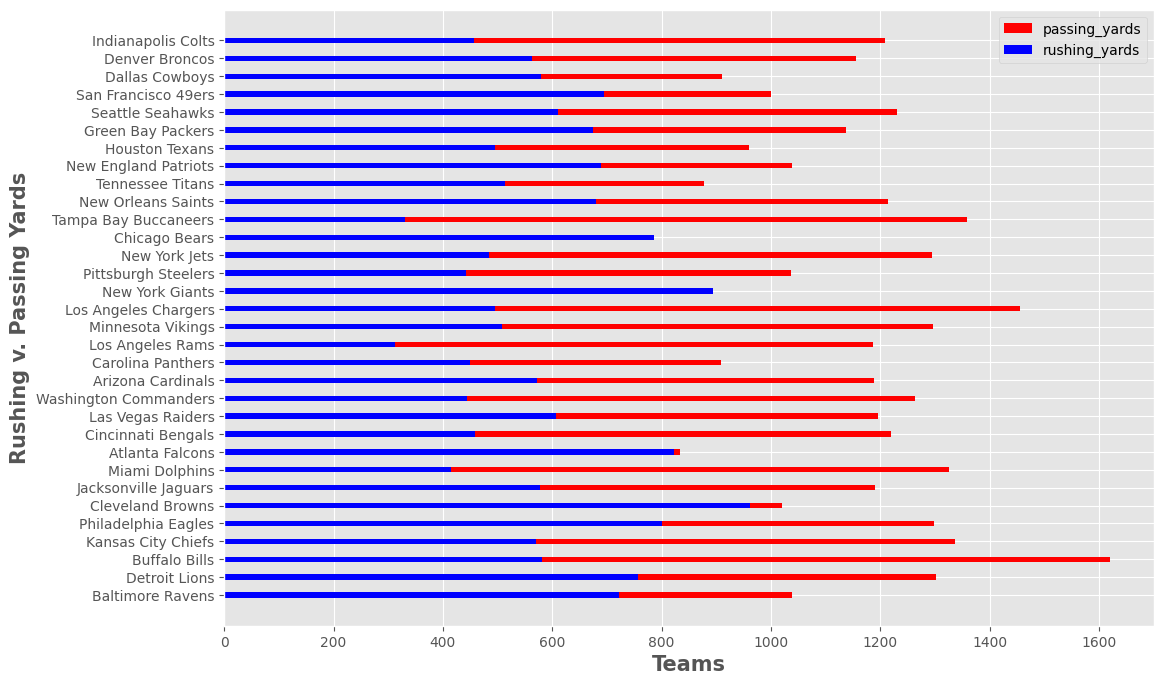

In [336]:
barWidth = .3
plt.subplots(figsize =(12, 8))


plt.barh(df.team, df.passing_yards, height = barWidth, color = 'red', label = 'passing_yards')
plt.barh(df.team, df.rushing_yards, height = barWidth, color = 'blue', label = 'rushing_yards')

plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('Rushing v. Passing Yards', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

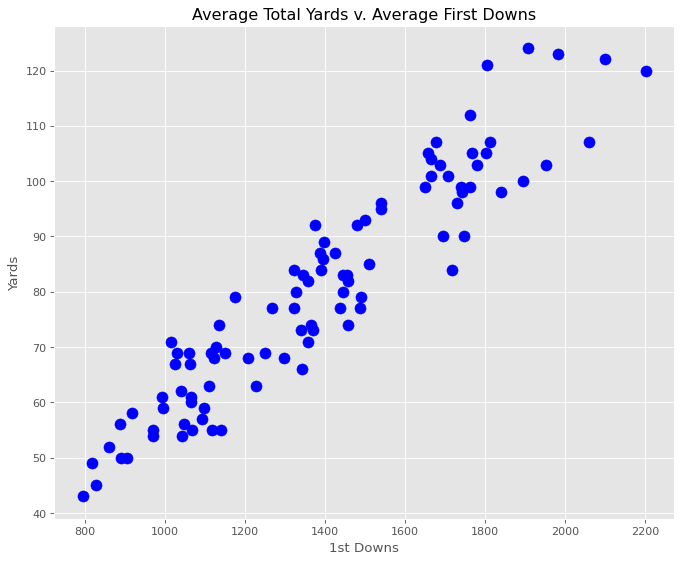

In [359]:
plt.figure(figsize=(10, 8), dpi=80)
 
plt.style.use('ggplot')

plt.title('Average Total Yards v. Average First Downs')
plt.xlabel('1st Downs')
plt.ylabel('Yards')
plt.scatter(x=df['total_yards'], y = df['1st_downs'], s = 100, color = 'blue')

plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

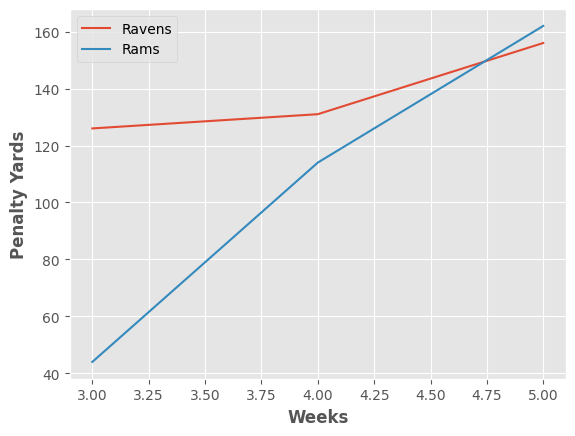

In [360]:
x = df.week.unique()
Ravens = df[df.team == 'Los Angeles Rams'].penalty_yards
Rams = df[df['team'].eq('Baltimore Ravens')].penalty_yards

plt.plot(x,Ravens)
plt.plot(x,Rams)

plt.legend(['Ravens', 'Rams'])

plt.xlabel('Weeks', fontweight ='bold')
plt.ylabel('Penalty Yards', fontweight ='bold')

plt.show()

6. Plot the average total points vs average yards per play for each team as a scatter chart (with total points on the y-axis and yards per play on the x-axis).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


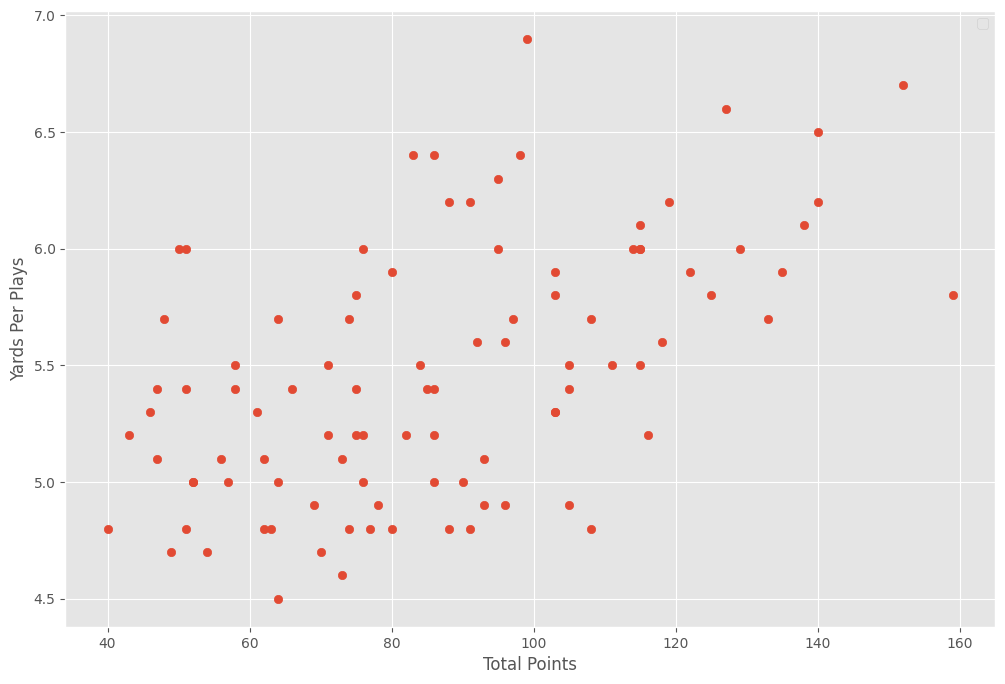

In [385]:
barWidth = .3
plt.subplots(figsize=(12, 8))

br1 = np.arange(len(df.passing_yards))
br2 = [x + barWidth for x in br1]

plt.scatter(df.points_scored, df.yards_per_play)

plt.xlabel('Total Points')
plt.ylabel('Yards Per Plays')
 
plt.legend()
plt.show()

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

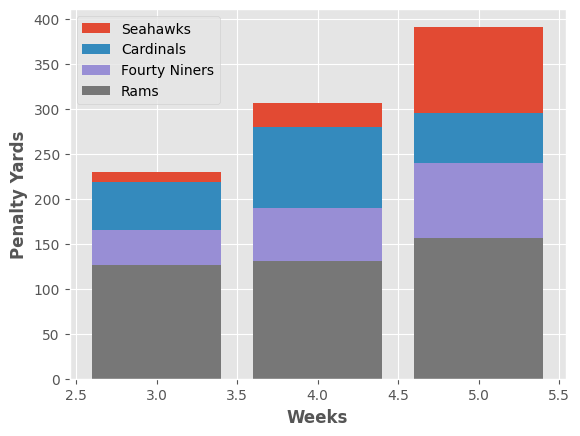

In [370]:
x = df.week.unique()
Cardinals = df[df.team == 'Arizona Cardinals'].penalty_yards
FourtyNiners = df[df.team == 'San Francisco 49ers'].penalty_yards
Seahawks = df[df.team == 'Seattle Seahawks'].penalty_yards
Rams = df[df.team == 'Los Angeles Rams'].penalty_yards

plt.bar(x,Seahawks)
plt.bar(x,Cardinals)
plt.bar(x,FourtyNiners)
plt.bar(x,Rams)

plt.legend(['Seahawks', 'Cardinals', 'Fourty Niners', 'Rams'])
plt.xlabel('Weeks', fontweight ='bold')
plt.ylabel('Penalty Yards', fontweight ='bold')

plt.show()

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

In [373]:
df.columns

Index(['rank', 'team', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       '1st_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'week'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'Conference'